<a href="https://colab.research.google.com/github/joaoxfernando/estudo-spreads/blob/main/Spread_ITSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ferramenta para calculo de Spread entre pares de ações

## Importando os módulos

In [ ]:
!pip install yfinance
import pandas as pd
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 9.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
# definindo os pares que vamos utilizar.
par_itausa = ['ITSA3.SA', 'ITSA4.SA']

# definindo data inicial e final para pesquisar cotações - formato deve ser: ANO-MES-DIA
data_inicial = '2022-01-01'
data_final = '2022-06-30'

## Pegando os dados de cada par e jogando em seu respectivo dataframe

In [ ]:
itsa3 = yf.Ticker(par_itausa[0])
df_itsa3 = itsa3.history(start=data_inicial, end=data_final)
itsa4 = yf.Ticker(par_itausa[1])
df_itsa4 = itsa4.history(start=data_inicial, end=data_final)

In [ ]:
columns_name = ['Abertura', 'Alta', 'Baixa', 'Fechamento', 'Volume', 'Dividendos', 'Desdobramentos']
df_itsa3.columns = columns_name
df_itsa3.reset_index(inplace=True)
df_itsa3.drop(['Alta', 'Baixa', 'Volume', 'Dividendos', 'Desdobramentos'], axis=1, inplace=True)
display(df_itsa3)

,Date,Abertura,Fechamento
0,2022-01-03,9.027570,8.911209
1,2022-01-04,8.920907,8.959694
2,2022-01-05,9.095447,8.949997
3,2022-01-06,8.949997,8.920907
4,2022-01-07,8.920907,9.134233
...,...,...,...
119,2022-06-23,9.250000,9.160000
120,2022-06-24,9.160000,9.010000
121,2022-06-27,9.110000,9.060000
122,2022-06-28,9.070000,9.030000


In [ ]:
df_itsa4.columns = columns_name
df_itsa4.reset_index(inplace=True)
df_itsa4.drop(['Alta', 'Baixa', 'Volume', 'Dividendos', 'Desdobramentos'], axis=1, inplace=True)
display(df_itsa4)

,Date,Abertura,Fechamento
0,2022-01-03,8.743563,8.743563
1,2022-01-04,8.753255,8.811417
2,2022-01-05,8.772643,8.714481
3,2022-01-06,8.704787,8.792028
4,2022-01-07,8.792028,8.898658
...,...,...,...
119,2022-06-23,8.860000,8.670000
120,2022-06-24,8.720000,8.630000
121,2022-06-27,8.680000,8.740000
122,2022-06-28,8.790000,8.630000


## Unindo os dois DataFrames em um novo

In [ ]:
df_itsa = pd.merge(df_itsa3, df_itsa4, how = 'left', on = 'Date')
final_columns = ['Data', 'Abertura ITSA3', 'Fechamento ITSA3', 'Abertura ITSA4', 'Fechamento ITSA4']
df_itsa.columns = final_columns
def sub(a,b):
  return b-a

df_itsa['Diferença Abertura'] = df_itsa.apply(lambda f: sub(f['Abertura ITSA4'], f['Abertura ITSA3']), axis=1)
df_itsa['Diferença Fechamento'] = df_itsa.apply(lambda f: sub(f['Fechamento ITSA4'], f['Fechamento ITSA3']), axis=1)
df_itsa

,Data,Abertura ITSA3,Fechamento ITSA3,Abertura ITSA4,Fechamento ITSA4,Diferença Abertura,Diferença Fechamento
0,2022-01-03,9.027570,8.911209,8.743563,8.743563,0.284007,0.167646
1,2022-01-04,8.920907,8.959694,8.753255,8.811417,0.167652,0.148277
2,2022-01-05,9.095447,8.949997,8.772643,8.714481,0.322804,0.235516
3,2022-01-06,8.949997,8.920907,8.704787,8.792028,0.245210,0.128879
4,2022-01-07,8.920907,9.134233,8.792028,8.898658,0.128879,0.235576
...,...,...,...,...,...,...,...
119,2022-06-23,9.250000,9.160000,8.860000,8.670000,0.390000,0.490000
120,2022-06-24,9.160000,9.010000,8.720000,8.630000,0.440000,0.380000
121,2022-06-27,9.110000,9.060000,8.680000,8.740000,0.429999,0.320001
122,2022-06-28,9.070000,9.030000,8.790000,8.630000,0.280000,0.400000


In [ ]:
with pd.ExcelWriter('spread-itsa.xlsx') as writer:
  df_itsa3.to_excel(writer, sheet_name='ITSA3')
  df_itsa4.to_excel(writer, sheet_name='ITSA4')
  df_itsa.to_excel(writer, sheet_name='SPREAD')

## *Plotando os gráficos*

### Gráfico com o matplotlib

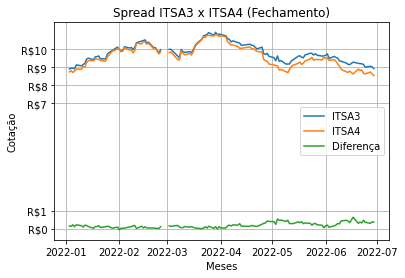

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


dados_x = df_itsa[['Data']]
dados_x.set_index('Data')
# dados_y = df_itsa[['Fechamento ITSA3']], df_itsa[['Fechamento ITSA4']], df_itsa[['Diferença Fechamento']]
dados_y = df_itsa
dados_y = dados_y.drop(['Data', 'Abertura ITSA3', 'Abertura ITSA4', 'Diferença Abertura'], axis=1)
dados_y.set_index('Fechamento ITSA3')
dados_diff = dados_y['Diferença Fechamento']
dados_diff = pd.DataFrame(dados_diff)
dados_diff.set_index('Diferença Fechamento')
plt.plot(dados_x, dados_y)

plt.legend(['ITSA3', 'ITSA4', 'Diferença'])
plt.title('Spread ITSA3 x ITSA4 (Fechamento)')
plt.xlabel('Meses')
plt.ylabel('Cotação')
plt.yticks([0,1,7, 8, 9,10], ['R$0', 'R$1', 'R$7', 'R$8', 'R$9', 'R$10'])
# datas = ['2022-01', '2022-02', '2022-03', '2022-04', '2022-05','2022-06','2022-07']
# plt.xticks(datasf, ['Jan','Fev', 'Mar','Abr','Mai','Jun','Jul'])
plt.figure.dpi=100
plt.style.use('seaborn-talk')
plt.rcParams["figure.figsize"] = (15, 5.5)
plt.rcParams["legend.loc"] = 'center left'
plt.grid()
plt.savefig('ITSA.png', dpi=250)
plt.savefig('ITSA.pdf', dpi=250)
plt.show()

### Gráficos com o Plotly

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=df_itsa['Data'],y=df_itsa['Fechamento ITSA3'], name='ITSA3',
    line_shape='spline'),
    secondary_y= False,
)
fig.add_trace(
    go.Scatter(x=df_itsa['Data'],y=df_itsa['Fechamento ITSA4'], name='ITSA4',
               line_shape='spline'),
    secondary_y= False,
)
fig.add_trace(
    go.Scatter(x=df_itsa['Data'],y=df_itsa['Diferença Fechamento'], name='Diferença',
               line_shape=''),
    secondary_y= False,
)
fig.update_xaxes(title_text="Mês (2022)")
fig.update_yaxes(title_text="Cotação")

fig.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = [0,1,8,9,10,11],
        ticktext = ['R$ 0', 'R$ 1', 'R$ 8', 'R$ 9', 'R$ 10', 'R$ 11']
    )
)

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = ['2022-02', '2022-03', '2022-04', '2022-05', '2022-06'],
        ticktext = ['Fevereiro', 'Março', 'Abril', 'Maio', 'Junho']
    )
)
fig.update_traces(textposition="bottom right")
fig.update_traces(connectgaps=True)
fig.show()

In [ ]:
diff = px.line(x=df_itsa['Data'], y=df_itsa['Diferença Fechamento'], line_shape='spline',
               labels={'y': 'Diferença Cotação (R$)', 'x': 'Mês (2022)'})
diff.update_traces(connectgaps=True)

diff.add_trace(go.Scatter(
        hovertemplate = 'Price: %{y:$.2f}<extra></extra>',
))
diff.update_traces(hovertemplate='Data: %{x} <br>Diferença Cotação: R$ %{y:.2f}') #

diff.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = [0,0.5,1],
        ticktext = ['R$ 0', 'R$ 0,50', 'R$ 1']
    ),
    xaxis = dict(
        tickmode = 'array',
        tickvals = ['2022-02', '2022-03', '2022-04', '2022-05', '2022-06'],
        ticktext = ['Fevereiro', 'Março', 'Abril', 'Maio', 'Junho']
    ),
    hoverlabel=dict(
        bgcolor="white",
        font_size=14,
        font_family="Roboto",
    )
)

diff.show()